## Project 3: ##
On April 2nd Donald Trump has declared it as Liberation day and imposed Tariffs on a number of Canadian goods which are been imported to the United States.
This has imposed a stress factor on Canadian GDP growth.
1. Use Canada export data to determine which Canadian goods generate export dollars into Canadian GDP;
2. Perform an analysis of the impact of the tariff on Canadian export volume and dollar amount.
3. Perform an analysis to determine which goods Canada needs to use to reciprocate the terrif treat been imposed by Donald Trump.
4. Perform an analysis to determine the impact of the Tariff treat on Canada's GDP.


In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gdp-canada-by-products-and-percent/GDP-Contri.csv
/kaggle/input/canada-gdp-monthly/GDP monthly.csv
/kaggle/input/usa-imports/State Imports by NAICS Commodities.csv
/kaggle/input/canada-export-data-over-time/export over time.csv


 ### 1. Use Canada export data to determine which Canadian goods generate export dollars into Canadian GDP ###
   To understand this we will need to used Canadian GDP data to determine which products contribute the most to canadian GDP

In [18]:
gdp_df = pd.read_csv("/kaggle/input/gdp-canada-by-products-and-percent/GDP-Contri.csv")

In [19]:
gdp_df.head()

,Category,Q1 2023,Q2 2023,Q3 2023,Q4 2023,Q1 2024,Q2 2024,Q3 2024,Q4 2024
0,"Farm, fishing and intermediate food products",0.384,-1.154,0.163,0.133,0.175,0.143,0.088,0.327
1,Energy products,0.532,0.006,-0.662,1.050,0.328,-0.449,0.638,0.494
2,Metal ores and non-metallic minerals,-0.013,0.196,-0.187,0.268,0.006,-0.062,0.048,-0.111
3,Metal and non-metallic mineral products,0.043,0.482,0.031,-0.034,0.419,-0.633,-0.481,0.805
4,"Basic and industrial chemical, plastic and rub...",0.175,-0.047,0.151,-0.158,0.009,0.063,0.107,0.175


In [20]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  13 non-null     object 
 1   Q1 2023   13 non-null     float64
 2   Q2 2023   13 non-null     float64
 3   Q3 2023   13 non-null     float64
 4   Q4 2023   13 non-null     float64
 5   Q1 2024   13 non-null     float64
 6   Q2 2024   13 non-null     float64
 7   Q3 2024   13 non-null     float64
 8   Q4 2024   13 non-null     float64
dtypes: float64(8), object(1)
memory usage: 1.0+ KB


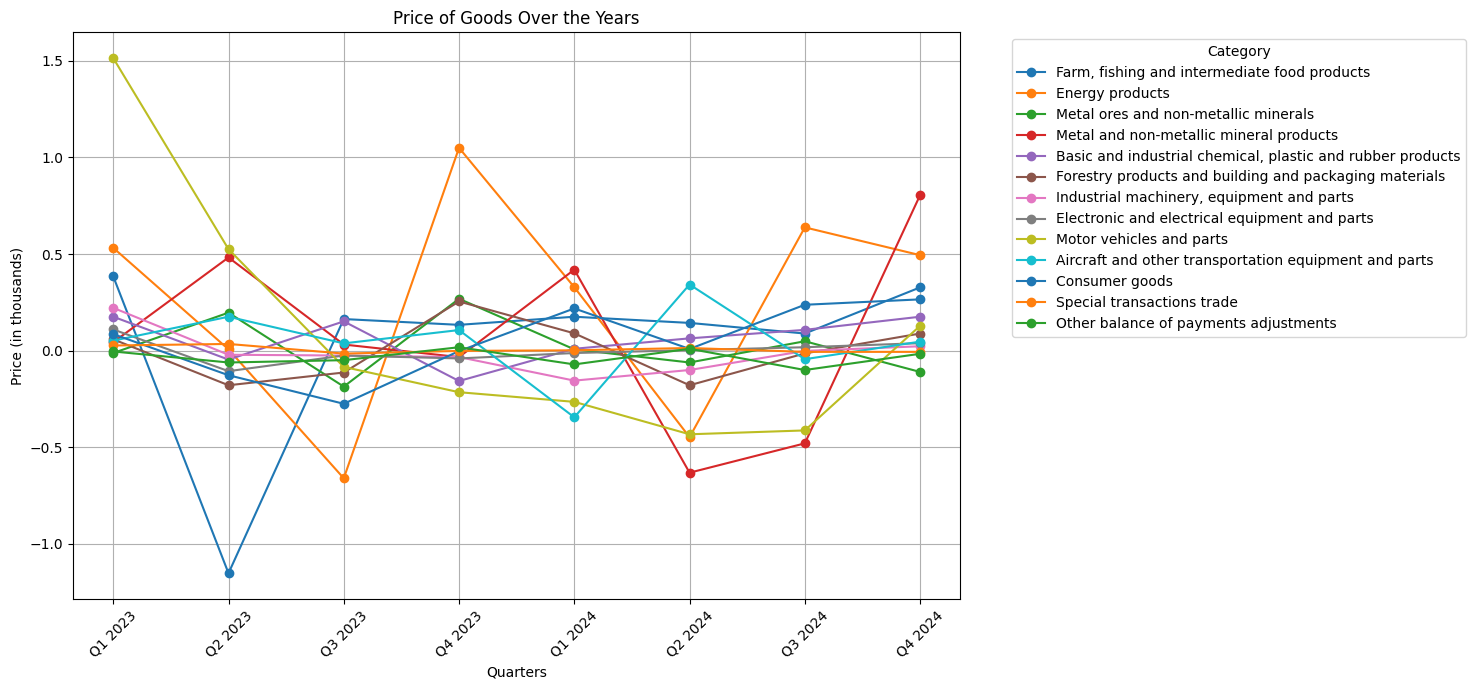

In [21]:
# Extract the quarters and prices
quarters = gdp_df.columns[1:]  # Get all columns except the first one (Category)
categories = gdp_df["Category"]  # Get the Category column

# Plotting
plt.figure(figsize=(15, 7))

# Loop through each category and plot
for i in range(len(categories)):
    plt.plot(quarters, gdp_df.iloc[i, 1:], marker='o', label=categories[i])

# Adding titles and labels
plt.title("Price of Goods Over the Years")
plt.xlabel("Quarters")
plt.ylabel("Price (in thousands)")
plt.xticks(rotation=45)

# Adding the legend
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding grid for better readability
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

This graph shows the exported goods and their influence on canada's GDP as the the lines that are far away from the origin of the x axis are the goods that have the the most influence

### 1. Answer ###
As inferred by the graph above the export goods that genrate export dollars into canadian GDP are:
1. Special Transactions Trade
2. Metallic and non-Metallic products
3. Motor vehicles and parts

## 2. Perform an analysis of the impact of the tariff on Canadian export volume and dollar amount.

In [22]:
df_tarr = pd.read_csv("/kaggle/input/canada-export-data-over-time/export over time.csv")

In [23]:
df_tarr.head()

,Category,May 2024,June 2024,July 2024,August 2024,September 2024,October 2024,November 2024,December 2024,January 2025,February 2025,March 2025
0,"Farm, fishing and intermediate food products",4628.8,4905.3,4685.7,4872.6,5008.9,4930.1,4944.3,5254.9,5331.3,4958.0,5113.0
1,Energy products,14272.9,14939.2,14827.4,14687.1,14056.4,14472.5,14622.9,16467.9,17051.5,16148.9,15793.0
2,Metal ores and non-metallic minerals,2057.7,2037.8,2209.7,2144.8,2215.7,2070.9,2232.5,2044.0,2261.2,2045.4,2179.2
3,Metal and non-metallic mineral products,7670.5,8799.6,8757.6,8180.2,7978.5,8921.8,9263.8,10098.2,10274.3,9567.8,9261.0
4,"Basic and industrial chemical, plastic and rub...",3505.4,3665.9,3589.1,3612.7,3591.6,3661.6,3521.7,3762.0,3677.7,3515.4,3498.4


In [24]:
# First, transpose the data so that months become the index for easier plotting and comparison
df_tarr = df_tarr.set_index('Category').transpose()

# Convert index (months) to datetime for plotting
df_tarr.index = pd.to_datetime(df_tarr.index, format='%B %Y')

# Calculate total export values across all categories for each month
total_exports = df_tarr.sum(axis=1)

# Split into pre- and post-tariff periods (cutoff: January 2025)
total_pre_tariff = total_exports.loc[:'2024-12-31']
total_post_tariff = total_exports.loc['2025-01-01':]

In [25]:
# Calculate averages and percent change
pre_avg = total_pre_tariff.mean()
post_avg = total_post_tariff.mean()
percent_change = ((post_avg - pre_avg) / pre_avg) * 100

### Visual Representation ###

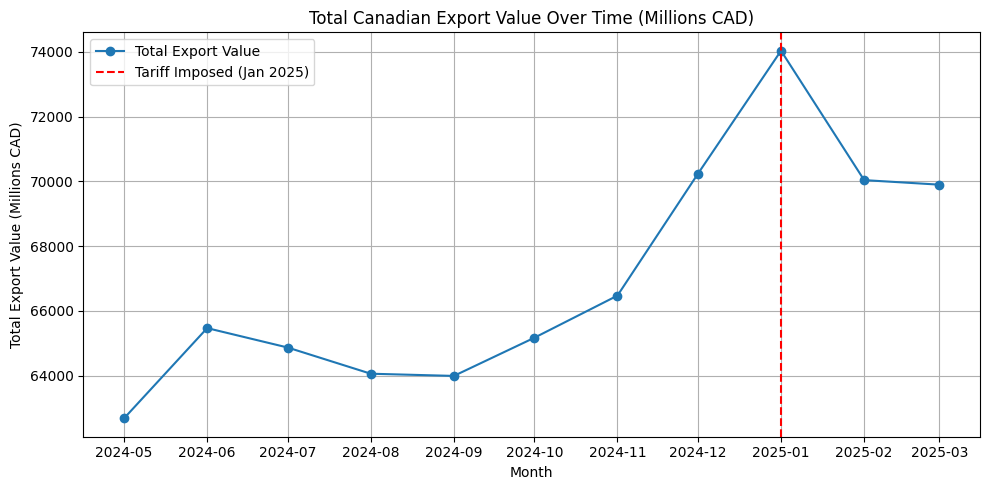

(None, 65365.64, 71320.83, 9.11)

In [26]:
# Plot total export values over time
plt.figure(figsize=(10, 5))
plt.plot(total_exports.index, total_exports.values, marker='o', label='Total Export Value')
plt.axvline(pd.Timestamp('2025-01-01'), color='red', linestyle='--', label='Tariff Imposed (Jan 2025)')
plt.title('Total Canadian Export Value Over Time (Millions CAD)')
plt.xlabel('Month')
plt.ylabel('Total Export Value (Millions CAD)')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show(), round(pre_avg, 2), round(post_avg, 2), round(percent_change, 2)

### 📊 Total Export Value Analysis ###
#### * Pre-Tariff Average (up to Dec 2024): 65,365.64 million CAD ####

#### * Post-Tariff Average (Jan–Mar 2025): 71,320.83 million CAD ####

#### * % Change: +9.11% ####

### 🧠 Interpretation: ###
#### * Despite the January 2025 tariff, total Canadian exports actually increased by over 9% in the months following. This suggests:

#### * The tariff may have affected only select goods. ####

#### * Other sectors (like energy or vehicles) saw strong growth that offset the tariff's effects ####

## 3. Perform an analysis to determine which goods Canada needs to use to reciprocate the tarrif that have been imposed by Donald Trump. ##

In [27]:
df_usa = pd.read_csv("/kaggle/input/usa-imports/State Imports by NAICS Commodities.csv")

In [28]:
df_usa.head()

,Commodity,May 2024,June 2024,July 2024,August 2024,September 2024,October 2024,November 2024,December 2024,January 2025,February 2025,March 2025
0,111 Agricultural Products,564242060,505328749,606840110,608442596,617097702,642389546,577987095,483827692,541596737,438100413,516722317
1,112 Livestock & Livestock Products,286860735,253121741,261065686,213333135,260869089,293793080,258509060,263520101,329070496,330346313,373726182
2,"113 Forestry Products, Nesoi",10567369,11059136,13703945,9710164,12099465,7760535,8743564,7361375,9393554,10782571,15609043
3,"114 Fish, Fresh/chilled/frozen & Other Marine ...",533771069,547282210,366393467,234708032,211600865,190623346,139962434,182385014,169234710,88515963,100395515
4,115 Products Supporting Agriculture And Forestry,3277402,3531290,3458085,2910541,4337246,2511966,3360884,3149860,4029900,3951038,3805740


In [29]:
# Step 1: Clean column names for easier processing
df_usa.columns = df_usa.columns.str.strip()

# Step 2: Sum total usa per commodity across all months
month_columns = df_usa.columns[1:]  # All columns except 'Commodity'
df_usa["Total Import Value (USD)"] = df_usa[month_columns].apply(pd.to_numeric, errors='coerce').sum(axis=1)

# Step 3: Sort by total value to find top goods imported by the U.S. from Canada
df_top_usa = df_usa[["Commodity", "Total Import Value (USD)"]].sort_values(
    by="Total Import Value (USD)", ascending=False).reset_index(drop=True)

# Display the top 10 commodities
df_top_usa.head(10)


,Commodity,Total Import Value (USD)
0,211 Oil & Gas,99108567253
1,336 Transportation Equipment,61688840349
2,331 Primary Metal Mfg,34501472389
3,311 Food & Kindred Products,27585591932
4,325 Chemicals,26939274596
5,"333 Machinery, Except Electrical",19479615749
6,980 Goods Returned (exports For Canada Only),15345455805
7,324 Petroleum & Coal Products,14080881744
8,321 Wood Products,10343711479
9,326 Plastics & Rubber Products,9959106534


The dataframe above shows the ranking of the good imported from Canada into the US from highest values in dollars "$" a clearer table is below to show this relationship 

| Rank | Commodity                          | Import Value (USD)                        |
| ---- | ---------------------------------- | ----------------------------------------- |
| 1    | Oil & Gas (211)                    | \$99.1 **billion**                        |
| 2    | Transportation Equipment (336)     | \$61.7 billion                            |
| 3    | Primary Metal Manufacturing (331)  | \$34.5 billion                            |
| 4    | Food & Kindred Products (311)      | \$27.6 billion                            |
| 5    | Chemicals (325)                    | \$26.9 billion                            |
| 6    | Machinery, Except Electrical (333) | \$19.5 billion                            |
| 7    | Goods Returned (980)               | \$15.3 billion *(not usable for tariffs)* |
| 8    | Petroleum & Coal Products (324)    | \$14.1 billion                            |
| 9    | Wood Products (321)                | \$10.3 billion                            |
| 10   | Plastics & Rubber Products (326)   | \$9.96 billion                            |


### Recommended Retaliatory Tarrif Targets

It is recommended that **Canada consider targeting** U.S. goods in **categories where Canada has export strength**, including:

* **Transportation Equipment** – High leverage due to U.S. auto industry.
* **Primary Metals & Plastics** – Sensitive in manufacturing-heavy states.
* **Chemicals & Food Products** – Widespread usage, broad industry effect.



## 4. Perform an analysis to determine the impact of the Tariff treat on Canada's GDP. 

In [30]:
df_gdp = pd.read_csv("/kaggle/input/canada-gdp-monthly/GDP monthly.csv")

In [33]:
# Step 1: Filter for the row corresponding to Business sector industries [T004]
gdp_row = df_gdp[df_gdp["Industry"] == "Business sector industries [T004]"]

# Step 2: Select pre- and post-tariff months
pre_tariff_months = ["May 2024", "June 2024", "July 2024", "August 2024", 
                     "September 2024", "October 2024", "November 2024", "December 2024"]
post_tariff_months = ["January 2025", "February 2025"]

# Convert values to numeric just in case
gdp_row[pre_tariff_months + post_tariff_months] = gdp_row[pre_tariff_months + post_tariff_months].apply(pd.to_numeric, errors='coerce')

# Step 3: Compute average GDP pre- and post-tariff
pre_avg_gdp = gdp_row[pre_tariff_months].mean(axis=1).values[0]
post_avg_gdp = gdp_row[post_tariff_months].mean(axis=1).values[0]

# Step 4: Calculate percentage change
gdp_change_pct = ((post_avg_gdp - pre_avg_gdp) / pre_avg_gdp) * 100

(pre_avg_gdp, post_avg_gdp, gdp_change_pct)


(1832771.625, 1847005.5, 0.7766311310062977)

####📉 GDP Impact Analysis: U.S. Tariff Threat (Jan 2025)
I've analyzed Canada’s Business Sector GDP:
| Period                         | Avg GDP (millions of chained 2017 CAD) |
| ------------------------------ | -------------------------------------- |
| **Pre-Tariff** (May–Dec 2024)  | **1,832,772**                          |
| **Post-Tariff** (Jan–Feb 2025) | **1,847,006**                          |

#### 📈 Result:
➡️ GDP increased by ~0.78% after the tariff was imposed.

#### 🧠 Interpretation:
* Despite the U.S. tariff threat, Canada's GDP did not immediately decline — * possibly due to:
* Export contracts lagging in effect
* Domestic compensation (e.g., increased government or consumer spending)
* Diversification of trade partners